<a href="https://colab.research.google.com/github/alejandromz2/Automated-Worker-Attendance-Application-for-Business-Presentations-in-Fima/blob/main/HistogramaTabla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install pandas hvplot panel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
%matplotlib inline
import hvplot.pandas


In [4]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Proyecto Fima/Libro1.xlsx')

In [5]:
df

,Unnamed: 0,UNIDAD,ACUM.\n2023,ACUM.\n2024,1er,ENE,SEM 01,SEM 02,SEM 03,SEM 04,...,FEB,SEM 06,SEM 07,SEM 08,SEM 09,MAR,SEM 10,SEM 11,SEM 12,SEM 13
0,NaN,MEDIDA,NaN,NaN,Cuatrim.,NaN,29 Dic-04 Ene,05-11 Ene,12-18 Ene,19-25 Ene,...,NaN,02-08 Feb,09-15 Feb,16-22 Feb,23-29 Feb,NaN,01-07 Mar,08-14 Mar,15-21 Mar,22-28 Mar
1,% Cumplimiento HH Programadas en semana,%,0.764244,0.926821,0.926821,0.936354,0.972538,0.981778,0.938801,0.895158,...,0.909953,0.951398,0.895681,0.904207,0.901011,0.936133,0.937193,0.896942,0.977405,0.939137
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HH Programadas,Hrs.,137196.597250,16763.356100,16763.3561,1782.939900,355.0332,404.4665,186.8228,566.9807,...,5977.755000,1112.7865,1532.4476,1737.3198,1595.2011,9002.661200,2492.2967,2570.7661,2254.3824,1685.216
4,HH Trabajadas,Hrs.,155709.203500,20211.816900,20211.8169,3352.576800,490.4434,584.1932,580.0867,862.3899,...,7490.131800,1483.9298,1786.2661,2074.2164,2145.7195,9369.108300,2514.5526,2591.413,2306.3928,1956.7499
5,HH Trabajadas Programadas,Hrs.,104851.720750,15536.629000,15536.629,1669.463400,345.2832,397.0965,175.3895,507.5374,...,5439.478200,1058.7031,1372.5842,1570.8966,1437.2943,8427.687400,2335.7631,2305.8293,2203.4457,1582.6493
6,HH Trabajadas No Programadas,Hrs.,49433.579450,4674.437900,4674.4379,1683.113400,145.1602,187.0967,404.6972,354.8525,...,2049.903600,425.2267,412.9319,503.3198,708.4252,941.420900,178.7895,285.5837,102.9471,374.1006
7,% Cumplimiento HH en Semana,%,1.134935,1.205714,1.205714,1.880364,1.381402,1.444355,3.10501,1.521022,...,1.253001,1.333526,1.165629,1.193917,1.345109,1.040704,1.00893,1.008031,1.023071,1.161127
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PB,%,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,...,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865


In [6]:
dfe = df.iloc[:, 2:]

In [7]:
dfe.drop([2,8,12], axis=0, inplace=True)
dfe

,ACUM.\n2023,ACUM.\n2024,1er,ENE,SEM 01,SEM 02,SEM 03,SEM 04,SEM 05,FEB,SEM 06,SEM 07,SEM 08,SEM 09,MAR,SEM 10,SEM 11,SEM 12,SEM 13
0,NaN,NaN,Cuatrim.,NaN,29 Dic-04 Ene,05-11 Ene,12-18 Ene,19-25 Ene,26 Ene-01 Feb,NaN,02-08 Feb,09-15 Feb,16-22 Feb,23-29 Feb,NaN,01-07 Mar,08-14 Mar,15-21 Mar,22-28 Mar
1,0.764244,0.926821,0.926821,0.936354,0.972538,0.981778,0.938801,0.895158,0.905503,0.909953,0.951398,0.895681,0.904207,0.901011,0.936133,0.937193,0.896942,0.977405,0.939137
3,137196.597250,16763.356100,16763.3561,1782.939900,355.0332,404.4665,186.8228,566.9807,269.6367,5977.755000,1112.7865,1532.4476,1737.3198,1595.2011,9002.661200,2492.2967,2570.7661,2254.3824,1685.216
4,155709.203500,20211.816900,20211.8169,3352.576800,490.4434,584.1932,580.0867,862.3899,835.4636,7490.131800,1483.9298,1786.2661,2074.2164,2145.7195,9369.108300,2514.5526,2591.413,2306.3928,1956.7499
5,104851.720750,15536.629000,15536.629,1669.463400,345.2832,397.0965,175.3895,507.5374,244.1568,5439.478200,1058.7031,1372.5842,1570.8966,1437.2943,8427.687400,2335.7631,2305.8293,2203.4457,1582.6493
6,49433.579450,4674.437900,4674.4379,1683.113400,145.1602,187.0967,404.6972,354.8525,591.3068,2049.903600,425.2267,412.9319,503.3198,708.4252,941.420900,178.7895,285.5837,102.9471,374.1006
7,1.134935,1.205714,1.205714,1.880364,1.381402,1.444355,3.10501,1.521022,3.098479,1.253001,1.333526,1.165629,1.193917,1.345109,1.040704,1.00893,1.008031,1.023071,1.161127
9,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865
10,NaN,NaN,NaN,0.944010,0.408864,0.462577,2.166209,0.625863,2.192976,0.342922,0.382128,0.269459,0.289711,0.444098,0.104571,0.071737,0.111089,0.045665,0.22199
11,0.900000,0.900000,0.9,0.900000,0.9,0.9,0.9,0.9,0.9,0.900000,0.9,0.9,0.9,0.9,0.900000,0.9,0.9,0.9,0.9


In [8]:
#Dimensionando
filas = dfe.shape[0]
columnas = dfe.shape[1]

dfe.index=[0,1,2,3,4,5,6,7,8,9,10]
dfe.index
dfe

,ACUM.\n2023,ACUM.\n2024,1er,ENE,SEM 01,SEM 02,SEM 03,SEM 04,SEM 05,FEB,SEM 06,SEM 07,SEM 08,SEM 09,MAR,SEM 10,SEM 11,SEM 12,SEM 13
0,NaN,NaN,Cuatrim.,NaN,29 Dic-04 Ene,05-11 Ene,12-18 Ene,19-25 Ene,26 Ene-01 Feb,NaN,02-08 Feb,09-15 Feb,16-22 Feb,23-29 Feb,NaN,01-07 Mar,08-14 Mar,15-21 Mar,22-28 Mar
1,0.764244,0.926821,0.926821,0.936354,0.972538,0.981778,0.938801,0.895158,0.905503,0.909953,0.951398,0.895681,0.904207,0.901011,0.936133,0.937193,0.896942,0.977405,0.939137
2,137196.597250,16763.356100,16763.3561,1782.939900,355.0332,404.4665,186.8228,566.9807,269.6367,5977.755000,1112.7865,1532.4476,1737.3198,1595.2011,9002.661200,2492.2967,2570.7661,2254.3824,1685.216
3,155709.203500,20211.816900,20211.8169,3352.576800,490.4434,584.1932,580.0867,862.3899,835.4636,7490.131800,1483.9298,1786.2661,2074.2164,2145.7195,9369.108300,2514.5526,2591.413,2306.3928,1956.7499
4,104851.720750,15536.629000,15536.629,1669.463400,345.2832,397.0965,175.3895,507.5374,244.1568,5439.478200,1058.7031,1372.5842,1570.8966,1437.2943,8427.687400,2335.7631,2305.8293,2203.4457,1582.6493
5,49433.579450,4674.437900,4674.4379,1683.113400,145.1602,187.0967,404.6972,354.8525,591.3068,2049.903600,425.2267,412.9319,503.3198,708.4252,941.420900,178.7895,285.5837,102.9471,374.1006
6,1.134935,1.205714,1.205714,1.880364,1.381402,1.444355,3.10501,1.521022,3.098479,1.253001,1.333526,1.165629,1.193917,1.345109,1.040704,1.00893,1.008031,1.023071,1.161127
7,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865,0.841865
8,NaN,NaN,NaN,0.944010,0.408864,0.462577,2.166209,0.625863,2.192976,0.342922,0.382128,0.269459,0.289711,0.444098,0.104571,0.071737,0.111089,0.045665,0.22199
9,0.900000,0.900000,0.9,0.900000,0.9,0.9,0.9,0.9,0.9,0.900000,0.9,0.9,0.9,0.9,0.900000,0.9,0.9,0.9,0.9


In [11]:
indices_columnas=dfe.columns
indices_fechas= dfe.iloc[0, :]


nuevo_indices = []
letras = [chr(i) for i in range(65, 91)]

for columna in indices_columnas:
    if columna[0:3] == 'SEM':
      nuevo_indices.append(indices_fechas[columna])
    elif columna[0:1] in letras:
      nuevo_indices.append(columna)
    elif columna[0:1] in ['1', '2', '3', '4']:
      nuevo_indices.append(columna)
    else:
      nuevo_indices.append(indices_fechas[columna])

nuevo_indices



['ACUM.\n2023',
 'ACUM.\n2024',
 '1er',
 'ENE',
 '29 Dic-04 Ene',
 '05-11 Ene',
 '12-18 Ene',
 '19-25 Ene',
 '26 Ene-01 Feb',
 'FEB',
 '02-08 Feb',
 '09-15 Feb',
 '16-22 Feb',
 '23-29 Feb',
 'MAR',
 '01-07 Mar',
 '08-14 Mar',
 '15-21 Mar',
 '22-28 Mar']

In [70]:
 CumplimientoHHP=dfe.iloc[1,:]
 CumplimientoHHS=dfe.iloc[7,:]
 Objetivo=dfe.iloc[9,:]
 Fecha=dfe.iloc[0,:]
# indices_histo = [dfe.columns[0], dfe.columns[1],dfe.columns[2]+' '+ Fecha[2], dfe.columns[3], dfe.iloc[0,4], dfe.iloc[0,5], dfe.iloc[0,6], dfe.iloc[0,7], dfe.iloc[0,8], dfe.columns[9], dfe.iloc[0,10], dfe.iloc[0,11], dfe.iloc[0,12], dfe.iloc[0,13], dfe.columns[14], dfe.iloc[0,15], dfe.iloc[0,16], dfe.iloc[0,17], dfe.iloc[0,18]]

In [153]:
dplot = [nuevo_indices, CumplimientoHHP*100, CumplimientoHHS*100, Objetivo*100]
dplot = pd.DataFrame(dplot).T
dplot.columns=["Fechas","CumplimientoHHP","CumplimientoHHS", "Objetivo"]

fplot = dplot
fplot


,Fechas,CumplimientoHHP,CumplimientoHHS,Objetivo
0,ACUM.\n2023,76.424432,84.186452,90.0
1,ACUM.\n2024,92.682091,84.186452,90.0
2,1er,92.682091,84.186452,90.0
3,ENE,93.635428,84.186452,90.0
4,29 Dic-04 Ene,97.253778,84.186452,90.0
5,05-11 Ene,98.177847,84.186452,90.0
6,12-18 Ene,93.880137,84.186452,90.0
7,19-25 Ene,89.515816,84.186452,90.0
8,26 Ene-01 Feb,90.550285,84.186452,90.0
9,FEB,90.995335,84.186452,90.0


In [154]:
meses = set(['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC'])
cmes = 0

for i, datos in fplot.iterrows():
    if datos[0] in meses:
        cmes += 1
        if cmes == 2:
          if csem == 3:
            fplot.drop([i-1, i-2, i-3], axis=0, inplace=True)
            # i=i-csem
            csem = 0
            cmes = 1
          elif csem == 4:
            fplot.drop([i-1, i-2, i-3, i-4], axis=0, inplace=True)
            # i = i-csem
            csem = 0
            cmes = 1
          else:
            fplot.drop([i-1, i-2, i-3, i-4, i-5], axis=0, inplace=True)
            # i = i-csem
            csem = 0
            cmes = 1
        else:
          i = i+1

    elif datos[0][0] in ['0','1','2','3','4']:
        if datos[0:2][0] in ['1er','2do','3er','4to']:
          fplot.drop(i, axis=0, inplace=True)
          i = i+1
        elif cmes == 1:
          csem = csem + 1
          i = i+1
        else:
          i = i+1


# Actualizar el índice después de eliminar filas
fplot.reset_index(drop=True, inplace=True)


1er


In [155]:
fplot

,Fechas,CumplimientoHHP,CumplimientoHHS,Objetivo
0,ACUM.\n2023,76.424432,84.186452,90.0
1,ACUM.\n2024,92.682091,84.186452,90.0
2,ENE,93.635428,84.186452,90.0
3,FEB,90.995335,84.186452,90.0
4,MAR,93.613291,84.186452,90.0
5,01-07 Mar,93.719303,84.186452,90.0
6,08-14 Mar,89.694247,84.186452,90.0
7,15-21 Mar,97.740547,84.186452,90.0
8,22-28 Mar,93.913736,84.186452,90.0


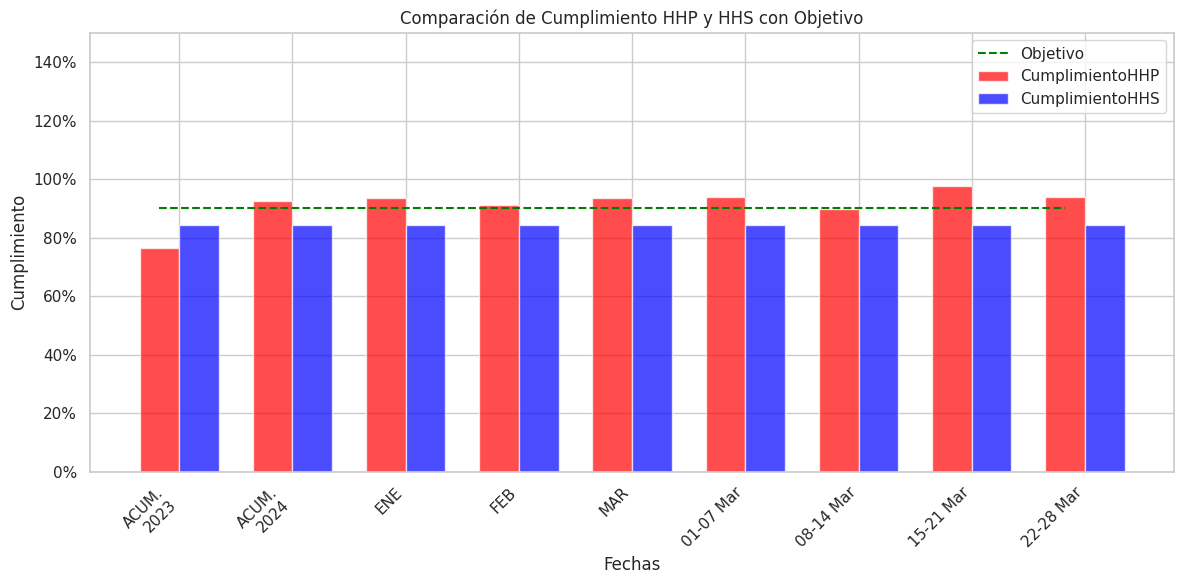

La presentación de PowerPoint se ha guardado como 'fima_presentacion.pptx'


<Figure size 640x480 with 0 Axes>

In [172]:
# Librerias
import numpy as np
from matplotlib.ticker import FuncFormatter

# Definir porcentaje
def porcentaje_formatter(x, pos):
    return f'{x:.0f}%'

objetivo = fplot['Objetivo'].iloc[0]  # Objetivo único para todas las fechas
x_dates = range(len(fplot))


# Definir el ancho de las barras
bar_width = 0.35

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar la función lineal para el objetivo
plt.plot(x_dates, [objetivo] * len(fplot), color='green', linestyle='--', label='Objetivo')

# Graficar los histogramas
plt.bar(np.arange(len(fplot)), fplot['CumplimientoHHP'], bar_width, color='red', label='CumplimientoHHP', alpha=0.7)
plt.bar(np.arange(len(fplot)) + bar_width, fplot['CumplimientoHHS'], bar_width, color='blue', label='CumplimientoHHS', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Fechas')
plt.ylabel('Cumplimiento')
plt.title('Comparación de Cumplimiento HHP y HHS con Objetivo')
plt.ylim(0, 150)
plt.legend()

# Formatear el eje y como porcentaje
formatter = FuncFormatter(porcentaje_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Establecer las etiquetas del eje x
plt.xticks(np.arange(len(fplot)) + bar_width / 2, fplot['Fechas'], rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [159]:
!pip install python-pptx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 16.0 MB/s eta 0:00:00


La presentación de PowerPoint se ha guardado como 'Indicadores de Planta Semana x-2024.pptx'


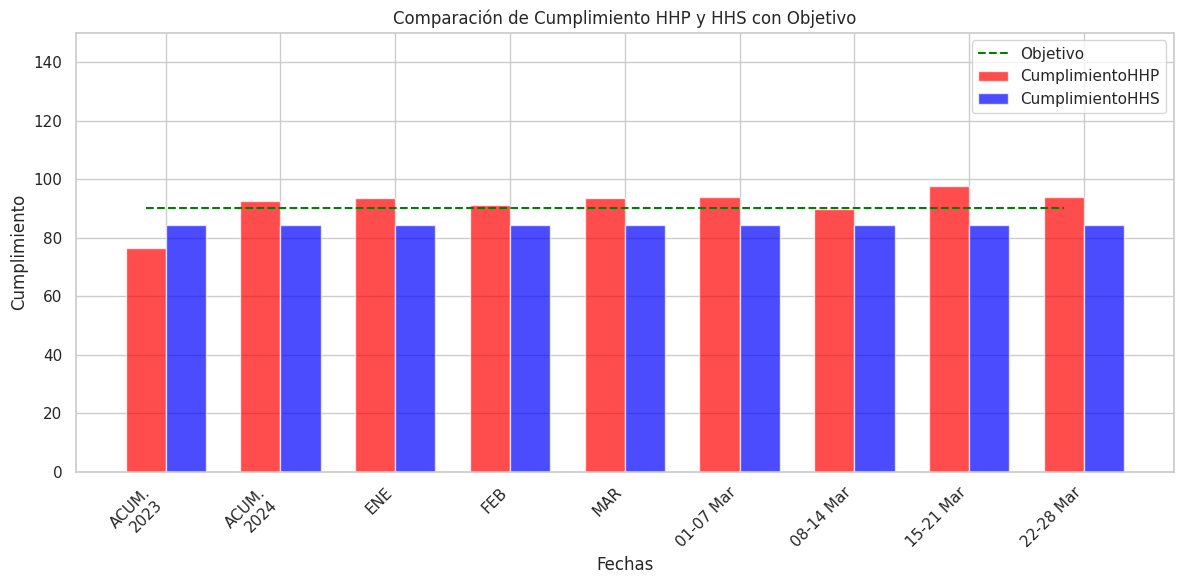

In [173]:
from pptx import Presentation
from pptx.util import Inches

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(x_dates, [objetivo] * len(fplot), color='green', linestyle='--', label='Objetivo')
plt.bar(np.arange(len(fplot)), fplot['CumplimientoHHP'], bar_width, color='red', label='CumplimientoHHP', alpha=0.7)
plt.bar(np.arange(len(fplot)) + bar_width, fplot['CumplimientoHHS'], bar_width, color='blue', label='CumplimientoHHS', alpha=0.7)
plt.xlabel('Fechas')
plt.ylabel('Cumplimiento')
plt.title('Comparación de Cumplimiento HHP y HHS con Objetivo')
plt.ylim(0, 150)
plt.legend()
plt.xticks(np.arange(len(fplot)) + bar_width / 2, fplot['Fechas'], rotation=45, ha='right')
plt.tight_layout()

# Guardar la gráfica como una imagen
chart_img_path = 'graficahisto.png'
plt.savefig(chart_img_path)

# Crear una presentación de PowerPoint
prs = Presentation()
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)

# Agregar la gráfica a la diapositiva como una imagen
left = Inches(1)
top = Inches(1)
slide.shapes.add_picture(chart_img_path, left, top, width=Inches(8))

# Guardar la presentación
pptx_file = 'Indicadores de Planta Semana x-2024.pptx'
prs.save(pptx_file)

print(f"La presentación de PowerPoint se ha guardado como '{pptx_file}'")


In [171]:
# import numpy as np
# from matplotlib.ticker import FuncFormatter
# def porcentaje_formatter(x, pos):
#     return f'{x:.0f}%'

# objetivo = dplot['Objetivo'].iloc[0]  # Objetivo único para todas las fechas
# x_dates = range(len(dplot))


# # Definir el ancho de las barras
# bar_width = 0.35

# # Crear la gráfica
# plt.figure(figsize=(12, 6))

# # Graficar la función lineal para el objetivo
# plt.plot(x_dates, [objetivo] * len(dplot), color='green', linestyle='--', label='Objetivo')

# # Graficar los histogramas
# plt.bar(np.arange(len(dplot)), dplot['CumplimientoHHP'], bar_width, color='red', label='CumplimientoHHP', alpha=0.7)
# plt.bar(np.arange(len(dplot)) + bar_width, dplot['CumplimientoHHS'], bar_width, color='blue', label='CumplimientoHHS', alpha=0.7)

# # Añadir etiquetas y título
# plt.xlabel('Fechas')
# plt.ylabel('Cumplimiento')
# plt.title('Comparación de Cumplimiento HHP y HHS con Objetivo')
# plt.ylim(0, 150)
# plt.legend()

# # Formatear el eje y como porcentaje
# formatter = FuncFormatter(porcentaje_formatter)
# plt.gca().yaxis.set_major_formatter(formatter)

# # Establecer las etiquetas del eje x
# plt.xticks(np.arange(len(dplot)) + bar_width / 2, dplot['Fechas'], rotation=45, ha='right')

# # Mostrar la gráfica
# plt.tight_layout()
# # plt.show()


In [ ]:
#  nuevos_indices = pd.DataFrame(dfe.columns + ' ' + dfe.iloc[0,:])
#  nuevos_indices = nuevos_indices
# nuevos_indices = nuevos_indices.values.tolist()
# nuevos_indices
# nuevos_indices = []
# for i in range(len(dfe.columns)):
#   if(dfe.iloc[0,i] != None):
#     nuevos_indices.append(str(dfe.columns[i]) + ' ' + str(dfe.iloc[0, i]))
#   else:
#     nuevos_indices.append(str(dfe.columns[i]))

# nuevos_indices


#  dfe.iloc[0,:]

In [1]:
# # Definir la función lineal para el objetivo
# objetivo = dplot['Objetivo'].iloc[0]  # Objetivo único para todas las fechas
# x_dates = range(len(dplot))

# # Crear la gráfica
# plt.figure(figsize=(12, 6))

# # Graficar la función lineal para el objetivo
# plt.plot(x_dates, [objetivo] * len(dplot), color='green', linestyle='--', label='Objetivo')

# # Crear el histograma utilizando seaborn
# sns.barplot(x='Fechas', y='CumplimientoHHP', data=dplot, color='red', label='CumplimientoHHP', alpha=0.7)
# sns.barplot(x='Fechas', y='CumplimientoHHS', data=dplot, color='blue', label='CumplimientoHHS', alpha=0.7)

# # Añadir etiquetas y título
# plt.xlabel('Fechas')
# plt.ylabel('Cumplimiento')
# plt.title('Comparación de Cumplimiento HHP y HHS con Objetivo')
# plt.ylim(0, 150)
# plt.legend()

# # Formatear el eje y como porcentaje
# plt.gca().yaxis.set_major_formatter(formatter)

# # Rotar las etiquetas del eje x para mejor legibilidad
# plt.xticks(rotation=45, ha='right')

# # Mostrar la gráfica
# plt.tight_layout()
# plt.show()


In [ ]:
# meses = set(['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC'])
# cmes = 0

# for i, datos in fplot.iterrows():
#     if datos[0] in meses:
#         cmes += 1
#         if cmes == 2:
#           if csem == 3:
#             fplot.drop([i-1, i-2, i-3], axis=0, inplace=True)
#             # i=i-csem
#             csem = 0
#             cmes = 1
#           elif csem == 4:
#             fplot.drop([i-1, i-2, i-3, i-4], axis=0, inplace=True)
#             # i = i-csem
#             csem = 0
#             cmes = 1
#           else:
#             fplot.drop([i-1, i-2, i-3, i-4, i-5], axis=0, inplace=True)
#             # i = i-csem
#             csem = 0
#             cmes = 1
#         else:
#           i = i+1

#     elif datos[0][0] in ['0','1','2','3','4']:
#         if cmes == 1:
#             csem = csem + 1
#             i = i+1
#         elif cmes == 1 or cmes == 0 and datos[0][:3] in ['1er','2do','3er','4to']:
#           print(datos[0])

#         else:

#           fplot.drop(i, axis=0, inplace=True)
#           i = i+1


# # Actualizar el índice después de eliminar filas
# fplot.reset_index(drop=True, inplace=True)
